# 3. Measuring Photometric Redshifts with EAZY for Cropped Region 2

In [1]:
import os, sys
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 3.1. Run EAZY

In [2]:
dir_eazy = '/data/users/abdurrouf/softwares/eazy-photoz/src'  # change this depending on your EAZY directory 

#### run the photo-z calculation
os.system('%s/eazy -p zphot.param2' % dir_eazy)

0

## 3.2. Check Fitting Results

In [3]:
sys.path.append('/data/users/abdurrouf/softwares/threedhst') # change this depending on your threedhst directory

import threedhst.eazyPy as eazy

Try ascii:
OUTPUT/photz2.zout
11570.545530 2.845199e-03 3.482247e-03 1.292185e-03
15039.937671 2.166867e-03 1.882248e-03 7.338014e-04
19933.935699 1.447434e-03 1.300661e-03 4.584004e-04
27699.654015 8.859687e-04 1.065098e-03 2.971377e-04
35766.602929 6.285238e-04 6.202704e-04 1.755671e-04
44153.971091 4.507829e-04 4.336091e-04 1.190189e-04
Try ascii:
OUTPUT/photz2.zout
11570.545530 3.014748e-03 3.869363e-03 1.361178e-03
15039.937671 1.864635e-03 2.248606e-03 8.007043e-04
19933.935699 9.547165e-04 1.369027e-03 4.701179e-04
27699.654015 4.747301e-04 5.751641e-04 2.184551e-04
35766.602929 2.722787e-04 2.119710e-04 1.026962e-04
44153.971091 1.475189e-04 8.041372e-05 5.153299e-05
Try ascii:
OUTPUT/photz2.zout
11570.545530 6.231338e-03 6.816185e-03 1.803222e-03
15039.937671 7.451586e-03 6.455316e-03 1.350352e-03
19933.935699 8.323457e-03 9.445729e-03 1.229988e-03
27699.654015 7.788430e-03 7.525977e-03 7.894953e-04
35766.602929 7.297232e-03 6.951833e-03 5.876035e-04
44153.971091 6.284560e-03 

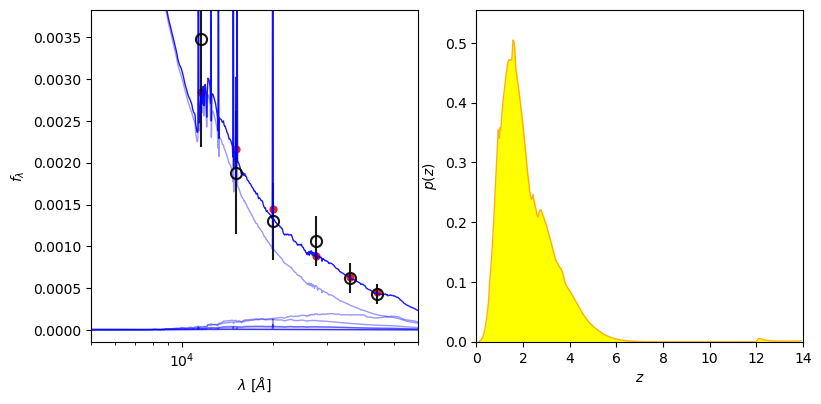

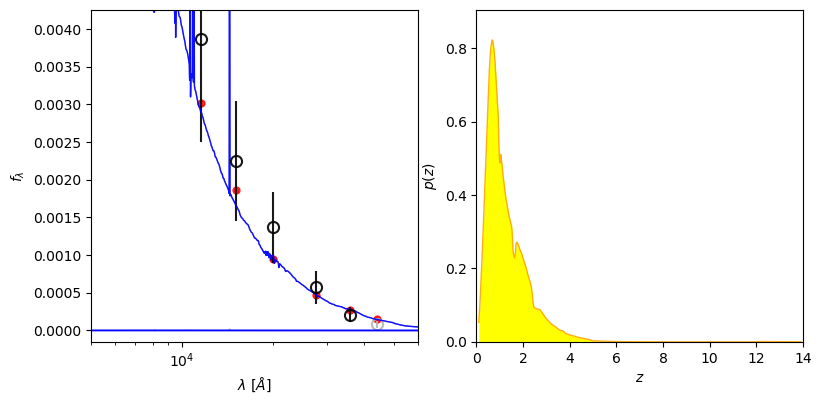

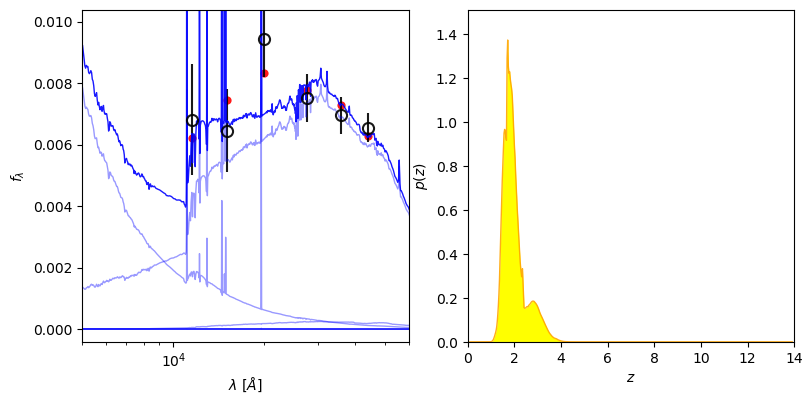

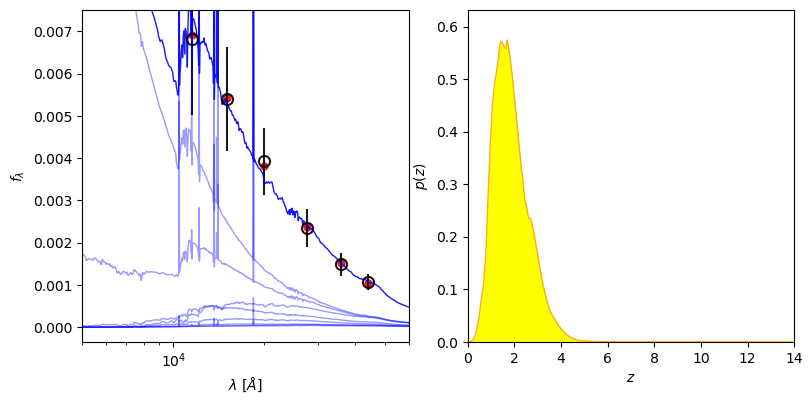

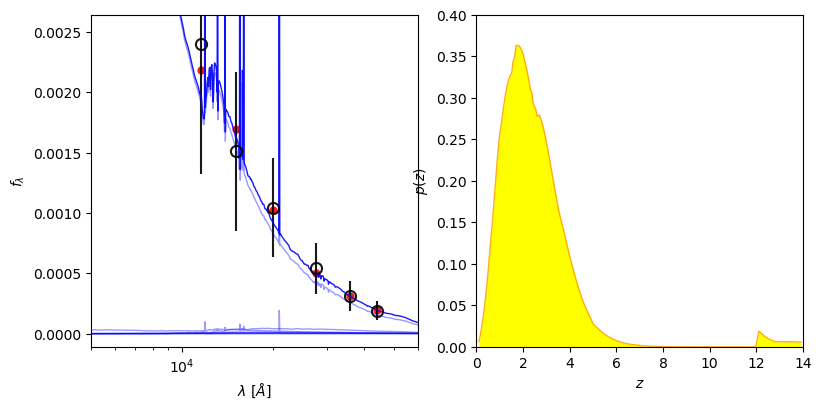

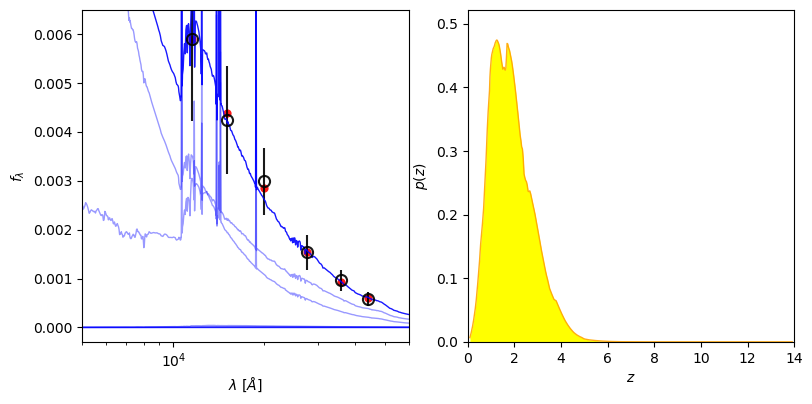

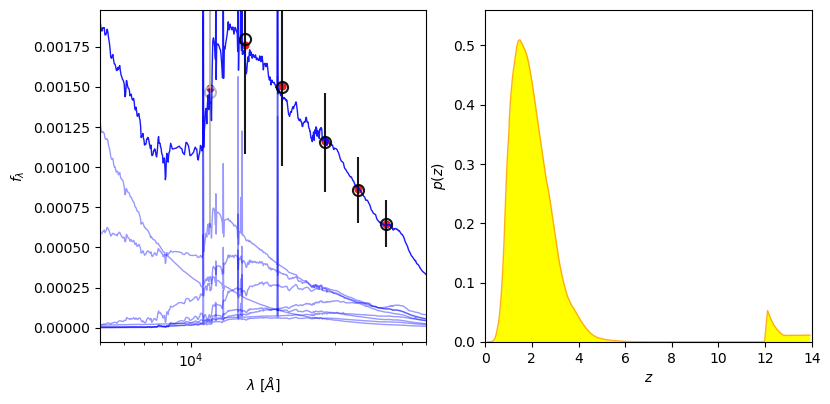

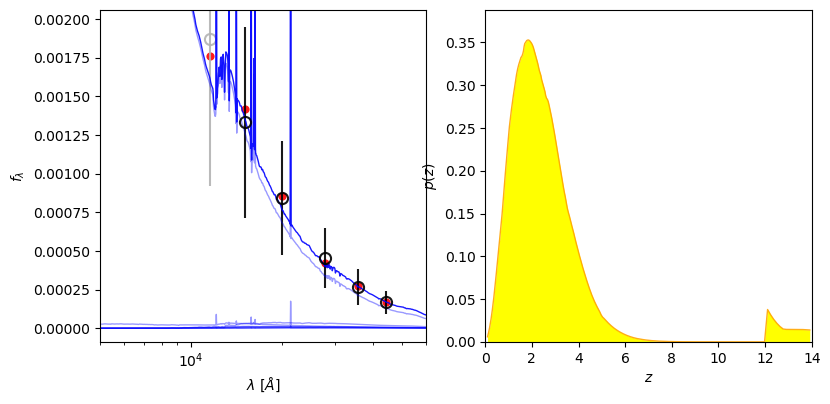

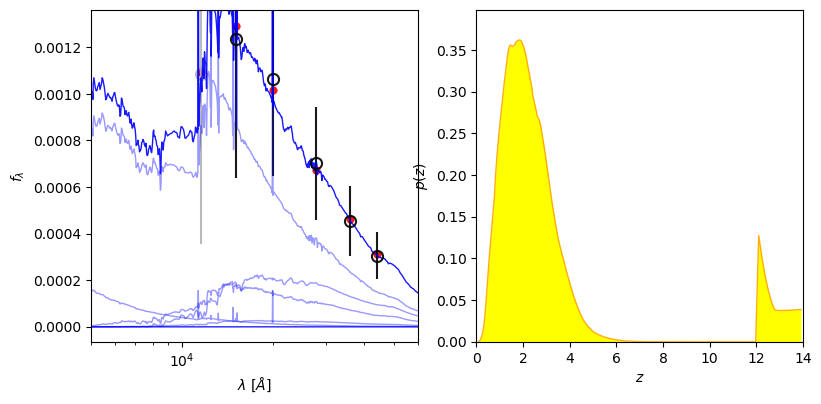

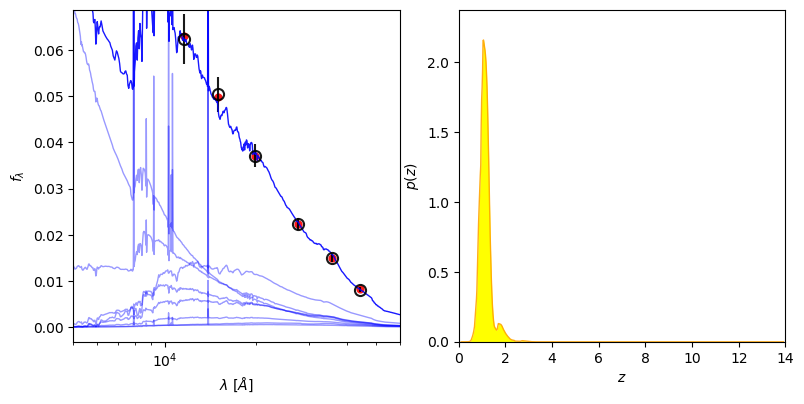

In [5]:
%matplotlib inline

# get number of objects
data = np.loadtxt('ceers_obj_crop2.cat')
nobj = len(data[:,0])

idx = np.random.randint(1,nobj,10)

for ii in idx:
    axes = eazy.plotExampleSED(idx=ii, writePNG=False, MAIN_OUTPUT_FILE='photz2',
                           OUTPUT_DIRECTORY='OUTPUT', CACHE_FILE='Same', lrange=[5000, 6.e4],
                           axes=None, individual_templates=True, fnu=False)